# Lecture 3 - Supervised Learning

Michael Mommert, 2023FS, Machine Learning (BBWL), University of St. Gallen

This notebook contains code to generate some of the visualizations presented in the lecture slides.

## iid

Different data samples generated by the same Normal distribution.

Generate iid data for n=10 samples:

generate histograms for both data sets:

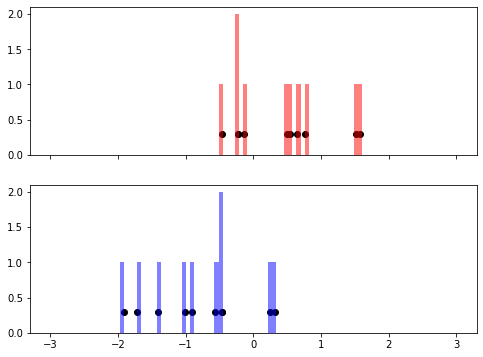

In [1]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42) # manually set seed for reproduceability

# generate data
a = np.random.normal(size=10)
b = np.random.normal(size=10)

# plot data
f, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(8, 6))

hist_a, bins = np.histogram(a, bins=np.linspace(-3, 3, 100))
hist_b, bins = np.histogram(b, bins=np.linspace(-3, 3, 100))

ax[0].bar((bins[1:]+bins[:-1])/2, hist_a, width=0.06, color='red', alpha=0.5)
ax[0].scatter(a, [0.3]*len(a), color='black')
ax[1].bar((bins[1:]+bins[:-1])/2, hist_b, width=0.06, color='blue', alpha=0.5)
ax[1].scatter(b, [0.3]*len(b), color='black')

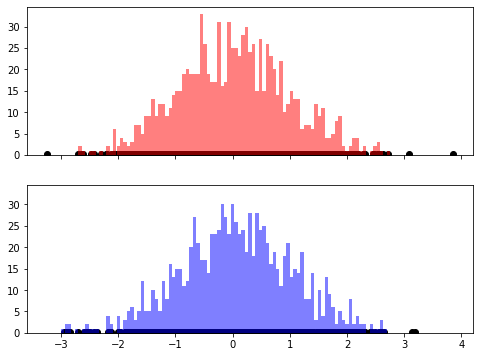

In [2]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42) # manually set seed for reproduceability

# generate data
a = np.random.normal(size=1000)
b = np.random.normal(size=1000)

# plot data
f, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(8, 6))

hist_a, bins = np.histogram(a, bins=np.linspace(-3, 3, 100))
hist_b, bins = np.histogram(b, bins=np.linspace(-3, 3, 100))

ax[0].bar((bins[1:]+bins[:-1])/2, hist_a, width=0.06, color='red', alpha=0.5)
ax[0].scatter(a, [0.3]*len(a), color='black')
ax[1].bar((bins[1:]+bins[:-1])/2, hist_b, width=0.06, color='blue', alpha=0.5)
ax[1].scatter(b, [0.3]*len(b), color='black')

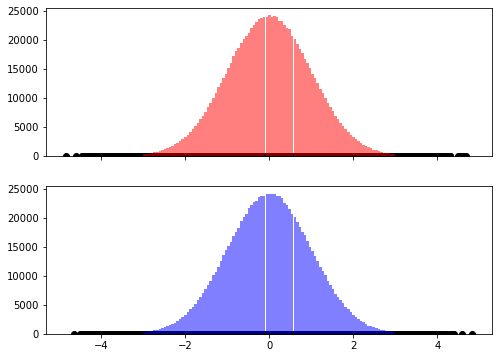

In [3]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42) # manually set seed for reproduceability

# generate data
a = np.random.normal(size=1000000)
b = np.random.normal(size=1000000)

# plot data
f, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(8, 6))

hist_a, bins = np.histogram(a, bins=np.linspace(-3, 3, 100))
hist_b, bins = np.histogram(b, bins=np.linspace(-3, 3, 100))

ax[0].bar((bins[1:]+bins[:-1])/2, hist_a, width=0.06, color='red', alpha=0.5)
ax[0].scatter(a, [0.3]*len(a), color='black')
ax[1].bar((bins[1:]+bins[:-1])/2, hist_b, width=0.06, color='blue', alpha=0.5)
ax[1].scatter(b, [0.3]*len(b), color='black')

## k-nearest neighbor classifier

Create a training data set of three clusters with ground-truth labels and a test data set drawn from the same distribution.

In [4]:
from numpy.random import multivariate_normal, seed

n_train = 50 # sample size per cluster in the train data set
n_test = 100 # sample size per cluster in the test data set

# set random seed
seed(42)

x_train = np.vstack(
    [multivariate_normal((0, 1), [[0.07, 0], [0, 0.07]], size=n_train),
     multivariate_normal((1, 1), [[0.07, 0], [0, 0.07]], size=n_train), 
     multivariate_normal((1, 0), [[0.07, 0], [0, 0.07]], size=n_train)])
y_train = np.array([0] * n_train + [1] * n_train + [2] * n_train)

x_test = np.vstack(
    [multivariate_normal((0, 1), [[0.07, 0], [0, 0.07]], size=n_test),
     multivariate_normal((1, 1), [[0.07, 0], [0, 0.07]], size=n_test), 
     multivariate_normal((1, 0), [[0.07, 0], [0, 0.07]], size=n_test)])
y_test = np.array([0] * n_test + [1] * n_test + [2] * n_test)

plot ground-truth

Text(0.5, 1.0, 'Test')

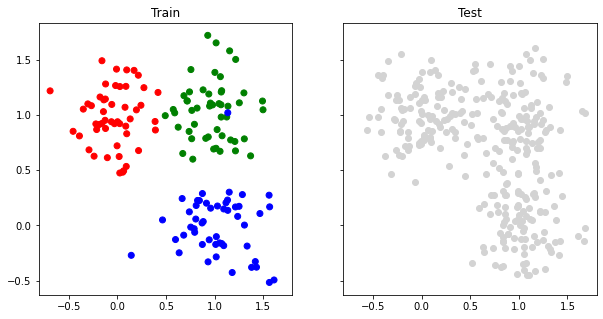

In [5]:
f, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 5))
ax[0].scatter(x_train[:,0], x_train[:,1], color=[{0: 'red', 1: 'green', 2: 'blue'}[l] for l in y_train])
ax[1].scatter(x_test[:,0], x_test[:,1], color='lightgray')

ax[0].set_title("Train")
ax[1].set_title("Test")

for each test sample identify $k$ closest train samples, identify majority class among those and assign to test sample

In [6]:
k = 5  # number of neighbor considered

def knn(x_train, y_train, x_sample, k):
    # compute distances
    distances = np.sqrt((x_train[:,0] - x_sample[0])**2 + (x_train[:,1] - x_sample[1])**2)
    
    # sort distances
    sort_indices = np.argsort(distances)

    # return most common class label among k closest neighbors
    return np.bincount(y_train[sort_indices[:k]]).argmax()

y_pred = np.empty(len(x_test))
for i, sample in enumerate(x_test):
    y_pred[i] = knn(x_train, y_train, sample, k)

plot results

accuracy: 0.9333333333333333


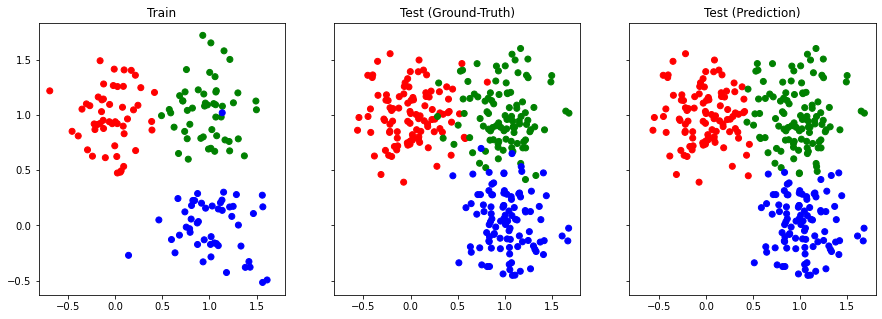

In [7]:
f, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15, 5))
ax[0].scatter(x_train[:,0], x_train[:,1], color=[{0: 'red', 1: 'green', 2: 'blue'}[l] for l in y_train])
ax[1].scatter(x_test[:,0], x_test[:,1], color=[{0: 'red', 1: 'green', 2: 'blue'}[l] for l in y_test])
ax[2].scatter(x_test[:,0], x_test[:,1], color=[{0: 'red', 1: 'green', 2: 'blue'}[l] for l in y_pred])

ax[0].set_title("Train")
ax[1].set_title("Test (Ground-Truth)")
ax[2].set_title("Test (Prediction)")

accuracy = (len(x_test)-sum(y_pred-y_test != 0))/len(x_test)
print('accuracy:', accuracy)

In [8]:
accuracy = (len(x_test)-sum(y_pred-y_test != 0))/len(x_test)
print('accuracy:', accuracy)

accuracy: 0.9333333333333333
